# Assignment 4:
### รหัสนักศึกษา: 65130701717
### ชื่อ-นามสกุล: RATTAWIT PATTARACHAROENPONG
### หลักสูตร: SED

In [3]:
#for creating nn + loading dataset 
import tensorflow as tf
from tensorflow import  keras
from tensorflow.keras import layers

#utilities
import numpy as np
import matplotlib.pyplot as plt

#for evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Fashion MNIST image dataset

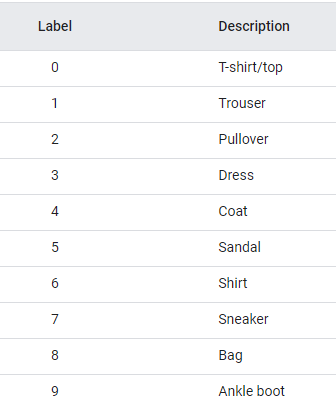

0. load ข้อมูลรูปภาพ fashion mnist 

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
print('Train data size:',x_train.shape)
print('Classes: ',np.unique(y_train))

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 
               'Sneaker', 'Bag', 'Ankle boot']



Train data size: (60000, 28, 28)
Classes:  [0 1 2 3 4 5 6 7 8 9]


1. แสดงตัวอย่างภาพที่โหลดมาได้ 1 ภาพ

TypeError: Invalid shape (60000, 28, 28) for image data

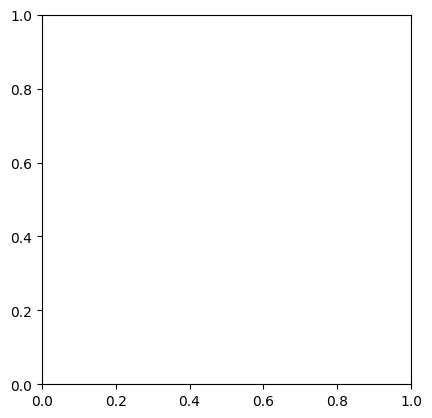

In [12]:
plt.imshow(x_train[...],cmap=plt.cm.binary)
plt.colorbar()
plt.show()

2. สร้างโครงสร้างของ Neural Networks ที่มี
- input layer เป็นตามขนาดภาพ 
- hidden layer 1 ชั้น จำนวน 128 node 
- output layer ตามจำนวนคลาส 

In [ ]:
model = keras.Sequential()
model.add(layers.Flatten(input_shape=(...,...)))
model.add(layers.Dense(..., activation="relu")) 
model.add(layers.Dense(..., activation="softmax"))

model.summary() 

3. แสดงการคำนวณ ค่าจำนวน Param #  100480 และ 1290

คำตอบ
* 100480 = ...
* 1290 = ... 

4. Compile และ กำหนดรปแบบการเรียนรู้ ได้แก่ optimizer, loss, metrics 
* optimizer = 'adam' 
* loss='sparse_categorical_crossentropy' 
* metrics=['accuracy']


In [ ]:
model.compile(optimizer = ... , loss= ... , metrics= ...)


5. ทำให้โมเดลเรียนรู้ด้วยชุดข้อมูลสอน กำนหนดจำนวนรอบ 10 รอบ

In [ ]:
model.fit(x_train, y_train, epochs=...)

6. ทำนายข้อมูลทดสอบ

In [ ]:
pred = model.predict(...)
y_pred =np.argmax(pred,axis=1)

7. แสดงตัวอย่างภาพทดสอบและผลการทำนาย

In [ ]:
plt.imshow(x_test[...],cmap=plt.cm.binary)
plt.colorbar()
plt.show()

print('Class:', class_names[y_pred[...]])

8. หา confusion matrix และแสดง ค่าตัวชี้วัดประสิทธิภาพต่างๆ 

In [ ]:
cfm = confusion_matrix(y_test,...)
eval = classification_report(...,y_pred)
print(eval)

9. ทำการสอนโมเดลและทดสอบในแต่ละรอบ เพื่อเก็บค่ามาไว้แสดงแนวโน้มประสิทธิภาพ โดยทำการ
* กำหนด epoch จำนวน 20 รอบ 
* validation_data=(x_test,y_test)

In [ ]:
model.fit(x_train, y_train, epochs=...., validation_data=...)

10. แสดงประสิทธิภาพในแต่ละรอบ

In [ ]:

plt.plot(model.history.history['accuracy'], label='training accuracy')
plt.plot(model.history.history[...], label='validation accuracy')
plt.plot(model.history.history[...], label='training loss')
plt.plot(model.history.history[...], label='validation loss')
plt.legend()
plt.show()


## CIFAR-10 dataset with 3 hidden layers

In [16]:
#For Excercise: CIFAR-10 dataset 
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()
print('Train data size:',x_train.shape)
print('Classes: ',np.unique(y_train))

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 
               'frog', 'horse', 'ship', 'truck']


Train data size: (50000, 32, 32, 3)
Classes:  [0 1 2 3 4 5 6 7 8 9]


1. แสดงตัวอย่างรูป

In [ ]:
plt.imshow(x_train[...],cmap=plt.cm.binary)
plt.colorbar()
plt.show()
print(class_names[y_train[...][0]])

2. สร้างโครงสร้างของ Neural Networks ที่มี
- input layer เป็นตามขนาดภาพ 
- hidden layer 3 ชั้น จำนวน 256, 128, 64 node 
- output layer ตามจำนวนคลาส 

In [ ]:
model = keras.Sequential()
model.add(layers.Flatten(input_shape=(...,...,...)))
model.add(layers.Dense(..., activation="relu")) 
model.add(layers.Dense(..., activation="relu")) 
model.add(layers.Dense(..., activation="relu")) 
model.add(layers.Dense(...., activation="softmax"))
model.summary()


3. แสดงการคำนวณ ค่าจำนวน Param #  

4. Compile และ กำหนดรปแบบการเรียนรู้ ได้แก่ optimizer, loss, metrics  


In [ ]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

5. ทำให้โมเดลเรียนรู้ด้วยชุดข้อมูลสอน  epochs=100, batch_size=64

In [ ]:
model.fit(x_train, y_train, epochs=..., batch_size=..., validation_data=(x_test,y_test))

6. แสดงประสิทธิภาพในแต่ละรอบ

In [ ]:
plt.plot(model.history.history['accuracy'], label='training accuracy')
plt.plot(model.history.history[...], label='validation accuracy')
plt.plot(model.history.history[...], label='training loss')
plt.plot(model.history.history[...], label='validation loss')
plt.legend()
plt.show()

6. ทำนายข้อมูลทดสอบ

In [ ]:
pred = model.predict(x_test)
y_pred =np....(pred,axis=1)

8. หา confusion matrix และแสดง ค่าตัวชี้วัดประสิทธิภาพต่างๆ 

In [ ]:
cfm = confusion_matrix(...,...)
eval = classification_report(...,...)
print(eval)

## CIFAR-10 dataset with CNN

In [ ]:
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

1. แสดงการคำนวณ Param #

2. compile และ fit จำนวน 10 epoch  batch_size = 64,

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=..., batch_size = ...,
                    validation_data=(x_test, y_test))

In [ ]:
plt.plot(model.history.history['accuracy'], label='training accuracy')
plt.plot(model.history.history['val_accuracy'], label='validation accuracy')
# plt.plot(model.history.history['loss'], label='training loss')
# plt.plot(model.history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

## CIFAR-10 dataset with VGG16

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2


In [ ]:
# #--------------------------- VGG16 Transfer Learning -------------------
base = VGG16(include_top=False, weights='imagenet')
# base = MobileNetV2(include_top=False, weights='imagenet')
# base = ResNet50(include_top=False, weights='imagenet')
base.trainable = False
base.summary()


In [ ]:
model = keras.Sequential()
model.add(layers.Input(shape=(32, 32, 3)))
model.add(base)
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
model.summary() 

In [ ]:

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size = 64,
                    validation_data=(x_test, y_test))

## R G B

1. อ่าน frame ภาพจาก วิดีโอ 

In [ ]:
import cv2

#### Explore Color ####
cap = cv2.VideoCapture(...)
while True:
    _,frame = cap.read()
    print(frame.shape)

    #BGR
    R = frame[:,:,2]
    G = frame[:,:,1]
    B = frame[:,:,0]

    cv2.imshow("frame",frame)
    cv2.imshow("R",R)
    cv2.imshow("G",G)
    cv2.imshow("B",B)

    key = cv2.waitKey(1) #& 0xFF
    if key == ord('q'):
        break

cv2.destroyAllWindows()




2. แสดงรูป Original, R, G, B ที่ทำเอง 

3. ตรวจจับวัตถุด้วย color threshold

In [ ]:
import cv2
### Object Detection with Color Threshold ###
cap = cv2.VideoCapture(..)
while True:
    _,frame = cap.read()
    print(frame.shape)

    #BGR
    R = frame[:,:,2]
    G = frame[:,:,1]
    B = frame[:,:,0]

    cv2.imshow("frame",frame)

    obj = (R...) & (G...) & (B...)
    obj = 1.0*blue_pen
    cv2.imshow("... Detection", obj)

    key = cv2.waitKey(1) #& 0xFF
    if key == ord('q'):
        break

cv2.destroyAllWindows()


4. แสดงตัวอย่างการตรวจจับวัตถุด้วยค่าสี

5. เขียนโปรแกรมเก็บภาพ อย่างน้อย 2 คลาส

In [ ]:
import cv2
import time

#### Read From USB Camera ####
cap = cv2.VideoCapture(0) 
while True:
    _,frame = cap.read()
    print(frame.shape)
    cv2.imshow("frame",frame)

    key = cv2.waitKey(1) #& 0xFF

    if key == ord('...'):
        timestr = time.strftime("%Y%m%d-%H%M%S")
        cv2.imwrite(filename="Images/.../" + timestr + ".jpg", img = frame)

    if key == ord('...'):
        timestr = time.strftime("%Y%m%d-%H%M%S")
        cv2.imwrite(filename="Images/.../" + timestr + ".jpg", img = frame)

    if key == ord('q'):
        break

cv2.destroyAllWindows()



6. แสดงตัวอย่างภาพที่อยู่ใน โฟลเดอร์แต่ละคลาส

## CNN pre-trained

In [ ]:
import tensorflow as tf
from tensorflow import  keras
from tensorflow.keras import layers

train_ds = keras.utils.image_dataset_from_directory(
    directory='Dataset/train/',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(224, 224))
test_ds = keras.utils.image_dataset_from_directory(
    directory='Dataset/test/',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(224, 224))



2. แสดงชื่อคลาส

In [ ]:
class_names = train_ds.class_names
print(class_names)

3. สร้างชั้น CNN  โดยใช้ package VGG16 กำหนด ดังนี้ 
- ไม่เอาชั้น fully connected nn โดยกำหนด include_top=False
- weights='imagenet'
- input_shape=(224,224,3)




In [5]:
from tensorflow.keras.applications.vgg16 import VGG16  #https://keras.io/api/applications/vgg/
import numpy as np

base = VGG16(include_top=False, weights='imagenet', input_shape=(224,224,3))

4. แสดงโครงสร้างของ base model ในข้อ 3


5. กำหนดให้ไม่ต้องมีการปรับค่า weight ของ base model

In [7]:
base.trainable = ...

6. กำหนดโครงสร้างของโมเดล สำหรับสอนข้อมูลภาพที่เราสร้างไว้ 

In [ ]:
model = keras.Sequential()
model.add(base)
model.add(layers.Flatten())
model.add(layers.Dense(2, activation='softmax'))
model.summary() 

7. กำหนดรูปแบบ การเรียนรู้ 
- loss='categorical_crossentropy' 
- optimizer='adam'
- metrics=['accuracy']

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

8. ให้โมเดลเรียนรู้จากข้อมูลสอน จำนวน 10 รอบ และกำหนด validation_data=test_ds

In [10]:
model.fit(train_ds, epochs=..., validation_data=test_ds)

Epoch 1/10
2/2 [==============================] - 9s 6s/step - loss: 13.1167 - accuracy: 0.3906 - val_loss: 4.5413e-07 - val_accuracy: 1.0000
Epoch 2/10
2/2 [==============================] - 9s 6s/step - loss: 1.4223 - accuracy: 0.8281 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 3/10
2/2 [==============================] - 13s 8s/step - loss: 0.0624 - accuracy: 0.9844 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
2/2 [==============================] - 13s 8s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
2/2 [==============================] - 13s 8s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
2/2 [==============================] - 13s 8s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
2/2 [==============================] - 13s 8s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.

9. บันทึก model ชื่อ 6xxxxxxx_model.h5

In [13]:
model.save('6xxxxxxx_model.h5')

10. อ่านภาพ และทำนาย ภาพ ว่าอยู่คลาสใด

In [19]:
import cv2
im = cv2.imread('.....')
imrz = cv2.resize(im,(224,224))
im_arr = tf.keras.utils.img_to_array(imrz)
im_arr = np.array([im_arr])  # Convert single image to a batch.
predictions = model.predict(im_arr)
str_class = class_names[predictions.argmax()]
print('Class: ', str_class)

image = cv2.putText(im,str_class,(50, 70), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 0), 2, cv2.LINE_AA)

cv2.imshow("image", image)
cv2.waitKey()



1/1 [==============================] - 0s 142ms/step
Class:  hand-zero


13

11. Optional

In [ ]:
cap = cv2.VideoCapture(1)
while True:
    _,frame = cap.read()
    print(frame.shape)
    im = cv2.resize(frame,(224,224))
    str_class = class_names[model.predict(np.array([im]))[0].argmax()]
        
    image = cv2.putText(frame,str_class,(50, 70), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 0), 2, cv2.LINE_AA)
    
    cv2.imshow("frame",image)

    key = cv2.waitKey(1) #& 0xFF
    if key == ord('q'):
        break

cv2.destroyAllWindows()


แสดงตัวอย่างผลงาน